

---
### Importing the libraries


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn import cluster

In [2]:
df = pd.read_csv('Thamirabarani.csv')

In [3]:
df.head()

,Sample S.NO:,Location,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value
0,1,Palayakkayal,10.4,15.200,22.600,29.4,7.91
1,2,Maranthalai,4.8,132.600,199.200,256.0,7.32
2,3,Mukkani,6.2,0.378,0.549,770.0,7.62
3,4,Konagaraya Kurichi River beach,2.0,85.800,128.800,156.7,7.03
4,5,Maranthalai,4.4,128.700,192.100,250.0,7.80


In [4]:
df.columns

Index(['Sample S.NO:', 'Location', 'Dissolved_Oxygen', 'TDS', 'Salinity',
       'Conductivity', 'PH_Value'],
      dtype='object')

In [5]:
df.shape

(20, 7)

### No Missing Values


In [6]:
df.isnull().sum()

Sample S.NO:        0
Location            0
Dissolved_Oxygen    0
TDS                 0
Salinity            0
Conductivity        0
PH_Value            0
dtype: int64

### Descriptive Statistical Analysis

In [8]:
df.describe()

,Sample S.NO:,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,5.150000,70.128000,105.063150,205.590000,7.389000
std,5.91608,1.737057,37.967389,56.995039,188.333377,0.269344
min,1.00000,2.000000,0.342000,0.514000,29.100000,6.920000
25%,5.75000,4.175000,62.850000,96.225000,129.425000,7.252500
50%,10.50000,4.900000,72.400000,108.350000,147.850000,7.325000
75%,15.25000,5.600000,87.325000,130.700000,198.025000,7.502500
max,20.00000,10.400000,132.600000,199.200000,770.000000,7.910000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sample S.NO:      20 non-null     int64  
 1   Location          20 non-null     object 
 2   Dissolved_Oxygen  20 non-null     float64
 3   TDS               20 non-null     float64
 4   Salinity          20 non-null     float64
 5   Conductivity      20 non-null     float64
 6   PH_Value          20 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


### Location is an object type

In [10]:
df['Location'].unique()

array(['Palayakkayal', 'Maranthalai', 'Mukkani',
       'Konagaraya Kurichi River beach', 'Thirutholaivillimangalam',
       'Eral', 'Murappanadu', 'Alwarthirunagari', 'Nanalkadu',
       'Srivaikundam'], dtype=object)

- Using labelencoder to change the location into an numerical format

In [12]:
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
df['Location']= label_encoder.fit_transform(df['Location'])

df['Location'].unique()

array([7, 3, 4, 2, 9, 1, 5, 0, 6, 8])

In [13]:
df

,Sample S.NO:,Location,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value
0,1,7,10.4,15.200,22.600,29.4,7.91
1,2,3,4.8,132.600,199.200,256.0,7.32
2,3,4,6.2,0.378,0.549,770.0,7.62
3,4,2,2.0,85.800,128.800,156.7,7.03
4,5,3,4.4,128.700,192.100,250.0,7.80
5,6,9,4.8,91.900,136.400,177.8,7.39
6,7,4,4.4,0.342,0.514,689.0,7.32
7,8,1,5.4,75.700,113.700,139.0,7.33
8,9,5,3.8,65.600,98.400,132.9,6.92
9,10,9,5.9,84.400,126.500,169.9,7.57


### Remove the irrevelant features

In [100]:
clean_data = df.drop('Sample S.NO:',axis=1)

### Correlation

In [101]:
clean_data.corr()

,Location,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value
Location,1.000000,0.433890,-0.314681,-0.314592,-0.179943,0.342155
Dissolved_Oxygen,0.433890,1.000000,-0.490039,-0.489189,-0.137373,0.610611
TDS,-0.314681,-0.490039,1.000000,0.999543,-0.365571,-0.275415
Salinity,-0.314592,-0.489189,0.999543,1.000000,-0.364816,-0.274465
Conductivity,-0.179943,-0.137373,-0.365571,-0.364816,1.000000,0.034202
PH_Value,0.342155,0.610611,-0.275415,-0.274465,0.034202,1.000000


<Axes: >

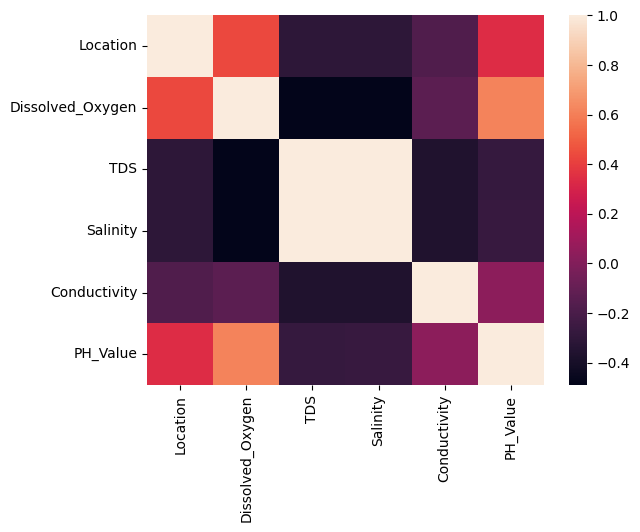

In [102]:
sns.heatmap(clean_data.corr())

### Scaling

In [103]:
scaler = StandardScaler()
scaler.fit(clean_data)

StandardScaler()

In [104]:
clean_data = pd.DataFrame(scaler.transform(clean_data), columns=clean_data.columns)

In [105]:
clean_data.head()

,Location,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value
0,0.870388,3.100868,-1.484299,-1.484435,-0.959825,1.984578
1,-0.522233,-0.206725,1.688157,1.694575,0.274617,-0.262833
2,-0.174078,0.620174,-1.884828,-1.881379,3.074720,0.879919
3,-0.870388,-1.860521,0.423499,0.427291,-0.266337,-1.367493
4,-0.522233,-0.442981,1.582769,1.566767,0.241931,1.565569


### Principal Component Analysis

In [106]:
pca = PCA()
pca.fit(clean_data)


PCA()

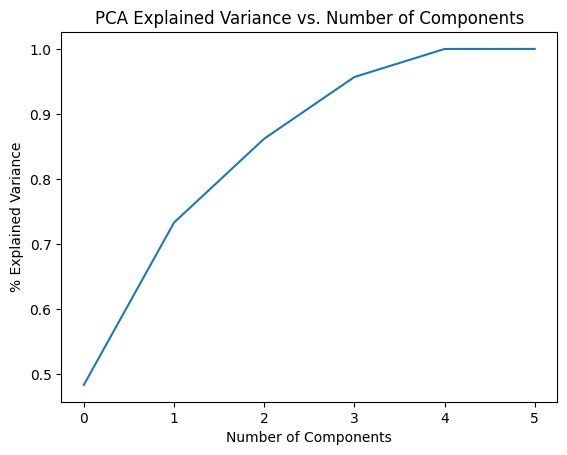

In [107]:
explained_variance_ratio = pca.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

- Variation graph

- 3 Components is more than enough to get high level result

In [108]:
pca = PCA(n_components = 3)
pca.fit(clean_data)
data_pca = pca.transform(clean_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2',"PC3"])
data_pca.head()

,PC1,PC2,PC3
0,3.790138,-1.845514,0.487141
1,-2.084929,-0.457432,0.905745
2,2.945945,2.694522,1.153807
3,-2.085155,1.028803,-0.816485
4,-1.422723,-0.934764,2.103268


### 3D ploting in scatterplot

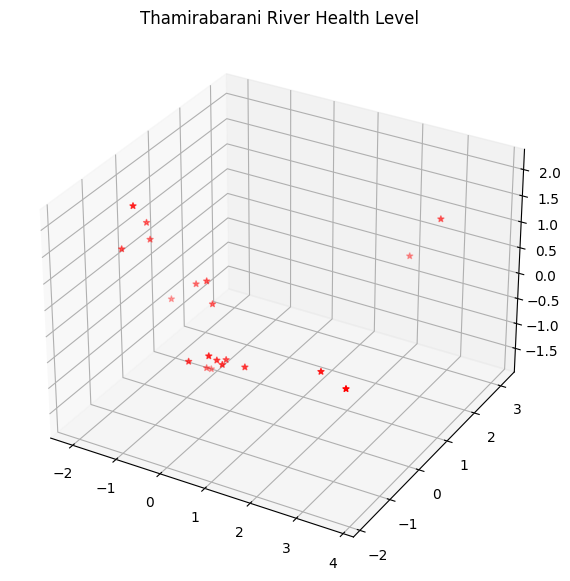

In [109]:
x=data_pca['PC1']
y=data_pca['PC2']
z=data_pca['PC3']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "red",marker="*")
plt.title("Thamirabarani River Health Level")

# show plot
plt.show()

### Model Fitting

In [110]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++',random_state=10)
kmeans.fit(data_pca)

KMeans(n_clusters=2, random_state=10)

In [111]:
kmeans.inertia_


58.9289196413696

In [112]:
kmeans.labels_

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int32)

In [113]:
silhouette_score(data_pca,kmeans.labels_)

0.4819516521887294

### Elbow Method

Text(0, 0.5, 'Inertia')

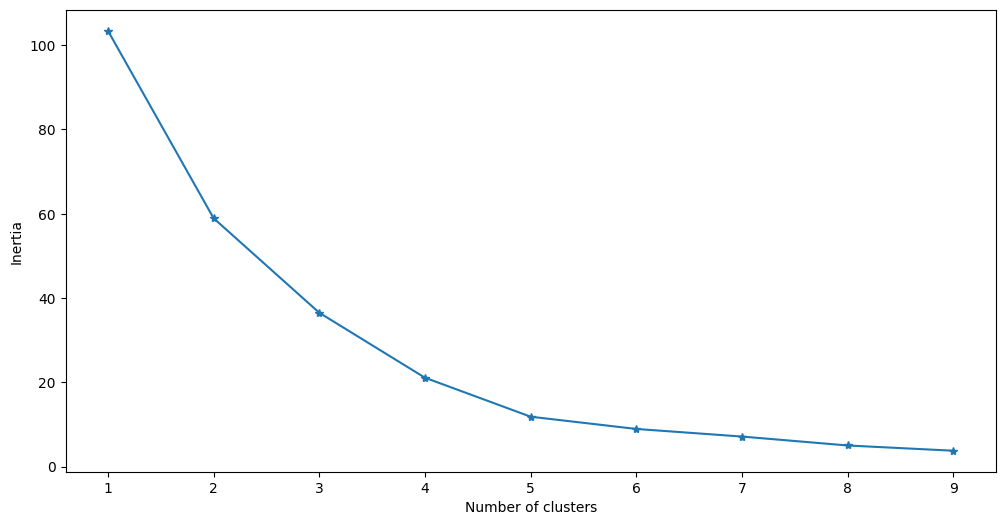

In [114]:
SSE = []
for i in range(1,10):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(data_pca)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [118]:
km = cluster.KMeans(n_clusters=5, init='k-means++',max_iter=20,random_state=10)
km.fit(data_pca)
pred = km.predict(data_pca)
pred

array([2, 3, 1, 0, 3, 4, 1, 0, 0, 4, 3, 3, 0, 4, 0, 0, 2, 4, 4, 4],
      dtype=int32)

In [119]:
km.labels_

array([2, 3, 1, 0, 3, 4, 1, 0, 0, 4, 3, 3, 0, 4, 0, 0, 2, 4, 4, 4],
      dtype=int32)

In [121]:
frame = pd.DataFrame(data_pca)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    6
4    6
3    4
2    2
1    2
Name: cluster, dtype: int64

In [122]:
data = df.copy()
data["cluster"] = pred

In [123]:
data

,Sample S.NO:,Location,Dissolved_Oxygen,TDS,Salinity,Conductivity,PH_Value,cluster
0,1,7,10.4,15.200,22.600,29.4,7.91,2
1,2,3,4.8,132.600,199.200,256.0,7.32,3
2,3,4,6.2,0.378,0.549,770.0,7.62,1
3,4,2,2.0,85.800,128.800,156.7,7.03,0
4,5,3,4.4,128.700,192.100,250.0,7.80,3
5,6,9,4.8,91.900,136.400,177.8,7.39,4
6,7,4,4.4,0.342,0.514,689.0,7.32,1
7,8,1,5.4,75.700,113.700,139.0,7.33,0
8,9,5,3.8,65.600,98.400,132.9,6.92,0
9,10,9,5.9,84.400,126.500,169.9,7.57,4


In [124]:
dataset = data_pca.copy()
dataset["cluster"] = pred

In [125]:
dataset

,PC1,PC2,PC3,cluster
0,3.790138,-1.845514,0.487141,2
1,-2.084929,-0.457432,0.905745,3
2,2.945945,2.694522,1.153807,1
3,-2.085155,1.028803,-0.816485,0
4,-1.422723,-0.934764,2.103268,3
5,-0.205650,-0.993761,-0.515215,4
6,2.001050,3.160132,-0.018787,1
7,-0.622716,0.178725,0.329702,0
8,-0.866099,0.618220,-1.701806,0
9,0.521863,-1.365667,-0.020988,4


### Clustering plot in 3D

In [126]:
import plotly.express as px


In [127]:
fig = px.scatter_3d(dataset, x="PC1", y="PC2", z="PC3", color='cluster', size_max=30)
fig.show()

- Finally  divided the data of riverwater sample into 5 different clustering